In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv(r'train.csv')

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
test = pd.read_csv(r'test.csv')

In [12]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


### 特征工程 

In [17]:
Bike_data = train

In [18]:
from datetime import datetime

In [20]:
Bike_data['date'] = Bike_data.datetime.apply(lambda c:c.split()[0])
Bike_data['year'] = Bike_data.datetime.apply(lambda c:c.split('-')[0]).astype('int')
Bike_data['month'] = Bike_data.datetime.apply(lambda c:c.split('-')[1]).astype('int')
Bike_data['weekday'] = Bike_data.datetime.apply(lambda c:pd.to_datetime(c).weekday())
Bike_data['hour'] = Bike_data.datetime.apply(lambda c:c.split()[1].split(':')[0]).astype('int')

In [21]:
Bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,5,4


In [22]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
year          10886 non-null int32
month         10886 non-null int32
weekday       10886 non-null int64
hour          10886 non-null int32
dtypes: float64(3), int32(3), int64(9), object(2)
memory usage: 1.3+ MB


In [23]:
# 矩阵
corrDf = Bike_data.corr()
corrDf

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,-0.084427,0.380540


In [24]:
import seaborn as sns

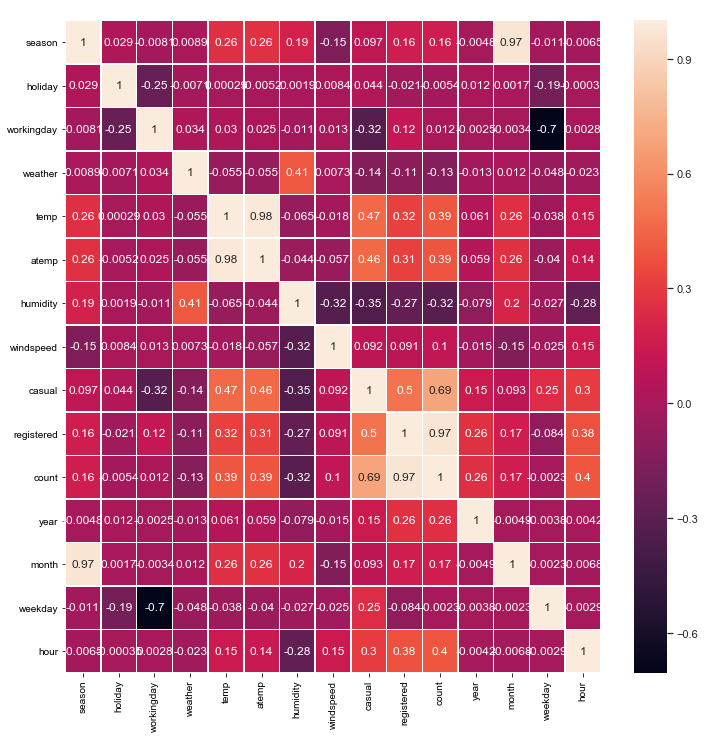

In [25]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(corrDf, ax=ax1, vmax=1, square=False, annot=True, linewidths=.5)
plt.title('Heatmap on correlation', color='white')
plt.show()

In [26]:
'''
count分析
和实际温度的相关性较高，且成正相关
和相对温度的相关性次之，且成负相关
和小时成正相关，与时间有线性关系
与季节年费都有关
'''

'\ncount分析\n和实际温度的相关性较高，且成正相关\n和相对温度的相关性次之，且成负相关\n和小时成正相关，与时间有线性关系\n与季节年费都有关\n'

In [27]:
# 特征数据

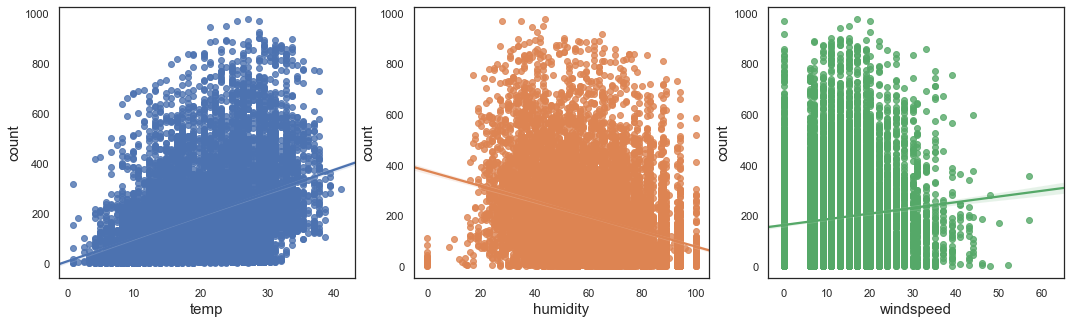

In [32]:
# 湿度、温度、风速
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,5))
sns.set(style='white')
# sns.despine()

ax1 = sns.regplot(x='temp', y='count', data=Bike_data, ax=ax1)
ax2 = sns.regplot(x='humidity',y='count', data=Bike_data, ax=ax2)
ax3 = sns.regplot(x='windspeed', y='count', data=Bike_data, ax=ax3)

# sns.despine()

ax1.set_xlabel('temp', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax2.set_xlabel('humidity', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax3.set_xlabel('windspeed', fontsize=15)
ax3.set_ylabel('count', fontsize=15)

plt.show()

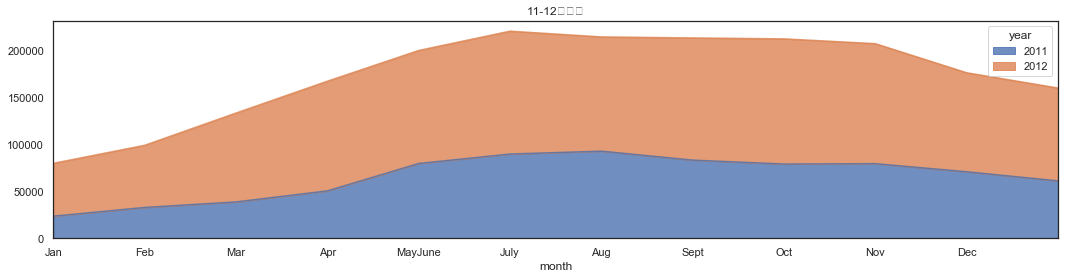

In [34]:
# 11-12
fig = plt.subplots(figsize=(18,4))
ax4 = plt.subplot(111)
df4 = Bike_data.groupby(['month', 'year']).sum().unstack()['count']
df4.plot(kind='area',ax=ax4, alpha=0.8)
ax4.set_title('11-12使用量')
ax4.set_xticks(list(range(13)))
ax4.set_xticklabels(['','Jan','Feb','Mar','Apr','May''June','July','Aug','Sept','Oct','Nov','Dec'])
ax4.set_xlim(1,12)
plt.show()

In [35]:
'''
12较11使用量有较大提升
'''

'\n12较11使用量有较大提升\n'

In [36]:
# 月平均使用量分析

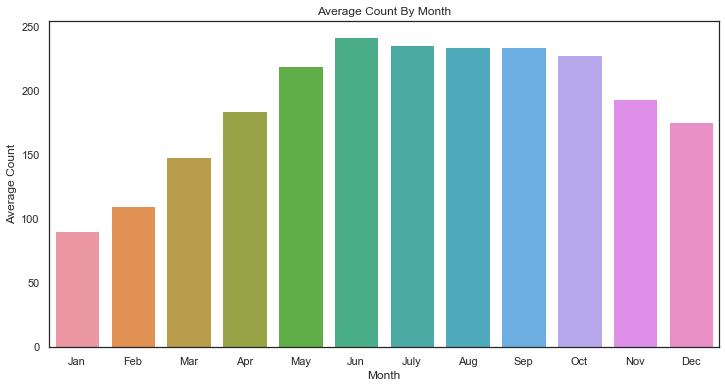

In [40]:
fig = plt.subplots(figsize=(12,6))
ax5 = plt.subplot(111)
monthDict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',
             10:'Oct',11:'Nov',12:'Dec'}
df5 = pd.DataFrame(Bike_data.groupby('month')['count'].mean()).reset_index()
df5['month_word']=df5['month'].map(monthDict)
sns.barplot(data=df5,x='month_word',y='count',ax=ax5)
ax5.set(xlabel='Month',ylabel='Average Count',title='Average Count By Month')
plt.show()

In [39]:
# 用户习惯分析

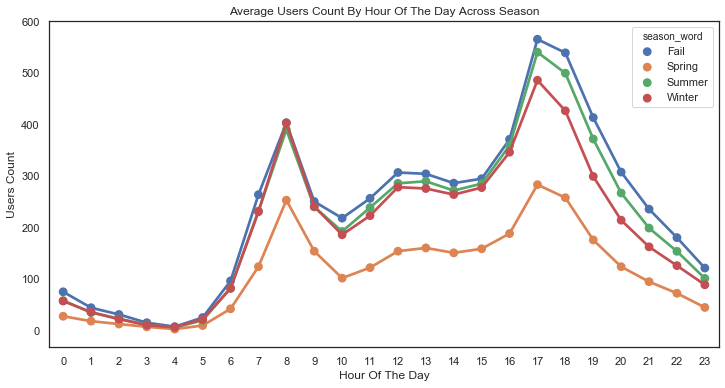

In [43]:
seasonDict={1:'Spring',2:'Summer',3:'Fail',4:'Winter'}
Bike_data['season_word']=Bike_data['season'].map(seasonDict)

fig=plt.subplots(figsize=(12,6))
ax6=plt.subplot(111)

# 季节--->使用情况
df6 = pd.DataFrame(Bike_data.groupby(['hour','season_word'])['count'].mean()).reset_index()
sns.pointplot(x=df6['hour'],y=df6['count'],hue=df6['season_word'],ax=ax6,data=df6,join=True)
ax6.set(xlabel='Hour Of The Day',ylabel='Users Count', title='Average Users Count By Hour Of The Day Across Season', label='big')
plt.show()

In [44]:
# 星期---

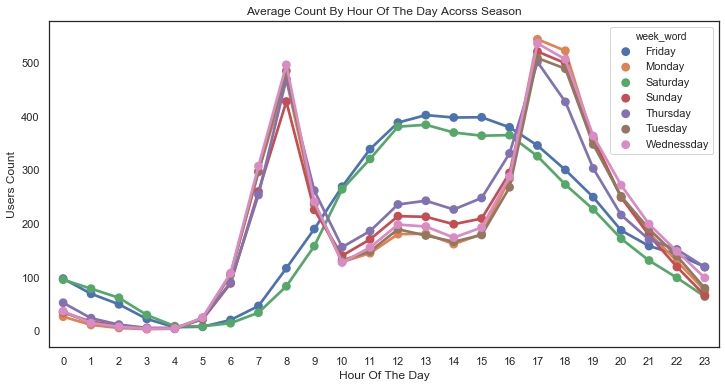

In [46]:
weekDict={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednessday',4:'Thursday',5:'Friday',6:'Saturday'}
Bike_data['week_word'] = Bike_data['weekday'].map(weekDict)

fig=plt.subplots(figsize=(12,6))
ax7=plt.subplot(111)
df7=pd.DataFrame(Bike_data.groupby(['hour','week_word'])['count'].mean()).reset_index()
sns.pointplot(x=df7['hour'],y=df7['count'],hue=df7['week_word'],ax=ax7,data=df7)
ax7.set(xlabel='Hour Of The Day',ylabel='Users Count',title='Average Count By Hour Of The Day Acorss Season',label='big')
plt.show()

In [47]:
# Others

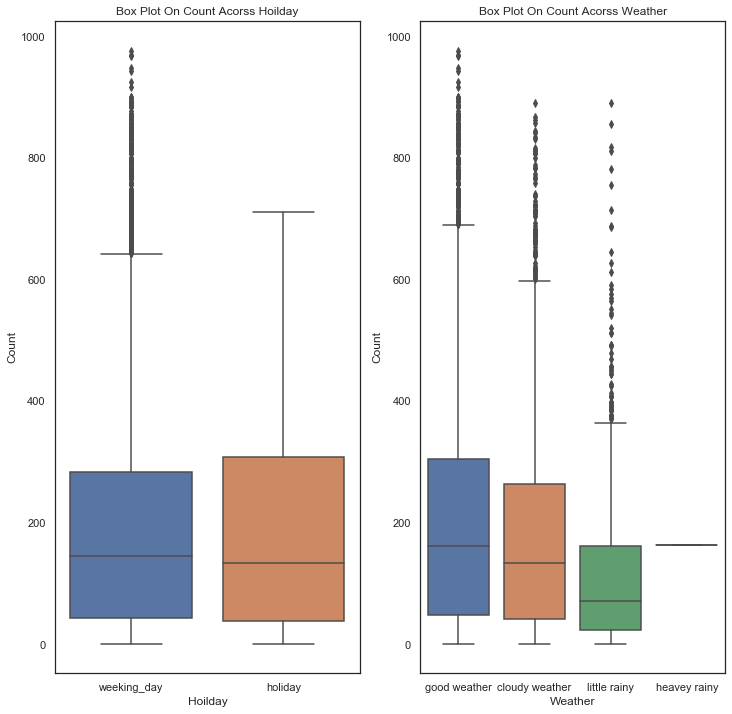

In [48]:
fig,(ax7,ax8)=plt.subplots(1,2)
fig.set_size_inches(12,12)

# 节假日
holidayDict={1:'holiday',0:'weeking_day'}
Bike_data['holiday_word']=Bike_data['holiday'].map(holidayDict)
ax7=sns.boxplot(x='holiday_word',y='count',data=Bike_data,orient='v',ax=ax7)
ax7.set(xlabel='Hoilday',ylabel='Count',title='Box Plot On Count Acorss Hoilday')


# 天气
weatherDict={1:'good weather',2:'cloudy weather',3:'little rainy',4:'heavey rainy'}
Bike_data['weather_word']=Bike_data['weather'].map(weatherDict)
ax8=sns.boxplot(x='weather_word',y='count',data=Bike_data,orient='v',ax=ax8)
ax8.set(xlabel='Weather',ylabel='Count',title='Box Plot On Count Acorss Weather')
plt.show()